In [6]:
pip install -U matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2d/d5/6227732ecab9165586966ccb54301e3164f61b470c954c4cf6940654fbe1/matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.4-cp311-cp311-win_amd64.whl (7.7 MB)


In [33]:
## Importing dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [8]:
## 1. Load the dataset and explore the variables

df = pd.read_csv('./files_for_lab/customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df['SeniorCitizen'].value_counts()[0]


## SeniorCitizen Binar mostly non-senior citizens
## Tenure: median tenure is 29 months
## MonthlyCharges: from 18.25 to 118.75 and a median of 70.35

5901

<Axes: xlabel='Churn', ylabel='count'>

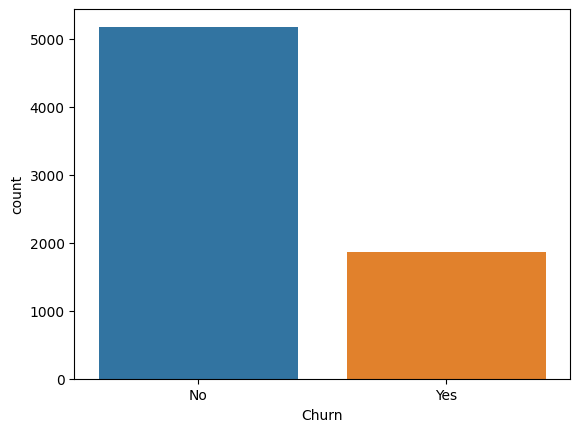

In [15]:
sns.countplot(x="Churn",data=df)

In [16]:
df.Churn.value_counts(normalize=True)
# imbalance of the classes
# 1 minority class

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [17]:
## 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen, MonthlyCharges.

In [18]:
## 3. Extract the target variable
y = df["Churn"]

## 4. Extracting independent variables
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [19]:
numerical_features = ['tenure', 'SeniorCitizen', 'MonthlyCharges']
categorical_features = []

In [20]:
## Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [21]:
## Scaling and Encoding

numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy="mean")),
                                       ("scaler", StandardScaler())
                                       ])
categorical_transformer = OneHotEncoder()


In [22]:
preprocessor = ColumnTransformer(
            transformers = [("numerical", numeric_transformer, numerical_features), 
                            ("categorical", categorical_transformer, categorical_features)]
)

In [23]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [25]:
## 5. Build the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [26]:
## Predictions
pred_train = classifier.predict(X_train)
display(pred_train)
pred_test = classifier.predict(X_test)
display(pred_test)

array([0, 0, 0, ..., 0, 1, 0])

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
## Probabilities
prob_train = classifier.predict_proba(X_train)
display(prob_train)

prob_test = classifier.predict_proba(X_test)
display(prob_test)

array([[0.71368965, 0.28631035],
       [0.84497845, 0.15502155],
       [0.74950804, 0.25049196],
       ...,
       [0.85208683, 0.14791317],
       [0.23246543, 0.76753457],
       [0.9267129 , 0.0732871 ]])

array([[0.74179257, 0.25820743],
       [0.95975841, 0.04024159],
       [0.98083547, 0.01916453],
       ...,
       [0.88645062, 0.11354938],
       [0.98368562, 0.01631438],
       [0.7022248 , 0.2977752 ]])

In [28]:
## This are the predictions

print("accuracy on train set", accuracy_score(y_train, pred_train))
print("accuracy on test set", accuracy_score(y_test, pred_test))
print("f1 score on train set", f1_score(y_train, pred_train))
print("f1 score on test set", f1_score(y_test, pred_test))

accuracy on train set 0.7878949236776713
accuracy on test set 0.8076650106458482
f1 score on train set 0.5278546029237455
f1 score on test set 0.5718799368088469


In [29]:
# Classification Report

print(classification_report(y_train, pred_train))

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4138
           1       0.65      0.45      0.53      1496

    accuracy                           0.79      5634
   macro avg       0.73      0.68      0.70      5634
weighted avg       0.77      0.79      0.77      5634

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.70      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



In [30]:
conf_matrix = confusion_matrix(y_test, pred_test)
conf_matrix

array([[957,  79],
       [192, 181]], dtype=int64)

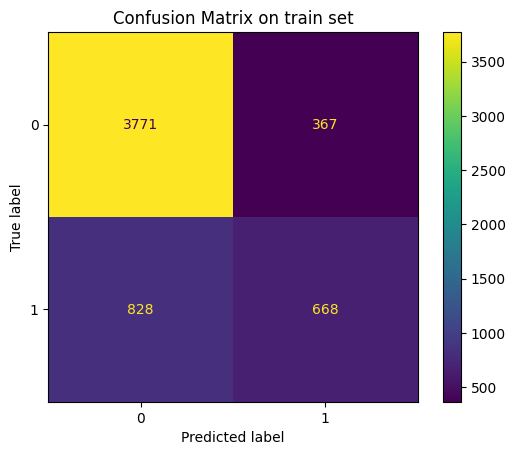

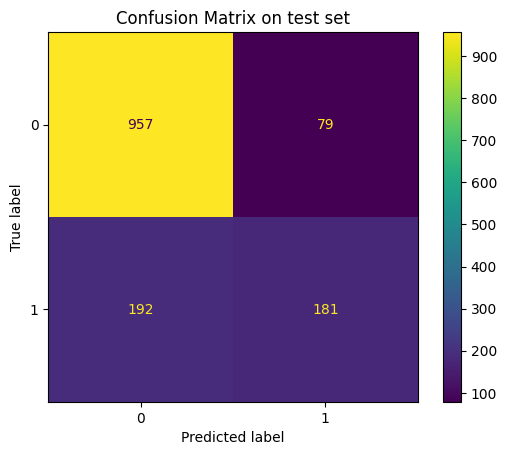

In [34]:
## Evaluation of the model with confussion matrix

_, ax= plt.subplots()
ax.set(title = "Confusion Matrix on train set")
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax)
plt.show()


_, ax= plt.subplots()
ax.set(title = "Confusion Matrix on test set")
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax)
plt.show()


## True Negatives (TN): 957
## False Positives (FP): 79
## False Negatives (FN): 192
## True Positives (TP): 181

In [134]:
## 7. A simple model can hit over 70% accuracy because maybe if one outcome (like "no churn") happens a lot more than the other, 
## the model might just guess the majority outcome most of the time, boosting accuracy. Even simple models can do well if they're given good, 
## relevant data to work with. Accuracy isn't the only way to measure success. 

In [50]:
## Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. 
## Build and evaluate the logistic regression model. Is it there any improvement?

## Applying SMOTE


sm = SMOTE(k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

# Checking the balance after SMOTE
balance_check = pd.Series(y_train_SMOTE).value_counts()

# Re-building the Logistic Regression model with SMOTE-applied data
model_smote = LogisticRegression()
model_smote.fit(X_train_SMOTE, y_train_SMOTE)

# Predictions with SMOTE model
y_pred_smote = model_smote.predict(X_test)

# Evaluating the SMOTE model
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

print(balance_check)
print(conf_matrix_smote) 
print(class_report_smote)


0    4138
1    4138
Name: count, dtype: int64
[[765 271]
 [ 89 284]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1036
           1       0.51      0.76      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.76      1409



In [ ]:
## Evaluation SMOTE

## Confusion Matrix:

## True Negatives (TN): 765
## False Positives (FP): 271
## False Negatives (FN): 89
## True Positives (TP): 284

In [ ]:
## Classification Report:

## Accuracy: 74% (a decrease compared to the initial model without SMOTE).

## Precision No Churn (0): 0.90 (High precision indicates a low false positive rate for the majority class).
## Precision Churn (1): 0.51 (Lower than No Churn, indicating a higher false positive rate for predicting churn).

## Recall No Churn (0): 0.74 (A significant portion of the actual No Churn cases were correctly identified).
## Recall Churn (1): 0.76 (An improvement, better identification of actual Churn cases compared to the initial model).

## F1-Score No Churn (0): 0.81
## F1-Score Churn (1): 0.61

### Conclussion

The precision for predicting no churn (0) is relatively high (90%), indicating that when the model predicts no churn, it's correct 90% of the time. However, the precision for predicting churn (1) is lower (51%), suggesting a higher rate of false positives. The recall for predicting churn (1) is relatively high (76%), which indicates that the model is good at identifying churn instances.

The F1-score for no churn (0) is higher (81%) compared to churn (1) (61%), which is mainly due to the lower precision in predicting churn.

While the accuracy slightly decreased after applying SMOTE, the model's ability to identify churn cases (which is often the primary objective in churn prediction) improved significantly. This showcases the importance of looking beyond accuracy when evaluating models, especially in imbalanced dataset scenarios.

In summary, the model performs reasonably well in identifying customers who are likely to churn, but there is room for improvement, especially in reducing false positives.

In [56]:
## Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases
## the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. 
## Build and evaluate the logistic regression model. Is it there any improvement?



len(X_train)

5634

In [58]:
pd.Series(y_train).value_counts()

0    4138
1    1496
Name: count, dtype: int64

In [64]:
## APPLYING THE TOMEKLINKS

tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

# Checking the balance after applying TomekLinks
balance_check_tl = pd.Series(y_train_tl).value_counts()

# Re-building the Logistic Regression model with TomekLinks-applied data
model_tl = LogisticRegression()
model_tl.fit(X_train_tl, y_train_tl)

y_pred_tl = model_tl.predict(X_test)

conf_matrix_tl = confusion_matrix(y_test, y_pred_tl)
class_report_tl = classification_report(y_test, y_pred_tl)

print(balance_check_tl)
print(conf_matrix_tl)
print(class_report_tl)

0    3725
1    1496
Name: count, dtype: int64
[[914 122]
 [168 205]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.63      0.55      0.59       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [67]:
## Evaluation TOMEKLINKS:

## Confusion Matrix:
## True Negatives (TN): 914
## False Positives (FP): 122
## False Negatives (FN): 168
## True Positives (TP): 205

In [ ]:
## Classification Report:

## Accuracy: 79% (improvement compared to the SMOTE).

## Precision for No Churn (0): 0.84 (good performance in correctly predicting the no churn cases).
## Precision for Churn (1): 0.63 (A measure of the accuracy when the model predicts churn).

## Recall for No Churn (0): 0.88
## Recall for Churn (1): 0.55 (improvement over the initial model, not as high as SMOTE).

## F1-Score for No Churn (0): 0.86
## F1-Score for Churn (1): 0.59

### Conclussion

In conclusion, employing Tomek Links has demonstrated enhanced classification performance, particularly in achieving a more balanced outcome in distinguishing churn and non-churn instances. This underscores the significance of under-sampling techniques in refining the model's performance by enhancing the decision space between classes.